<a href="https://colab.research.google.com/github/Anishi2528/Anishi2528/blob/main/stock_price_prediction_Apple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TASK 5 : STOCK PRICE PREDICTION 

In [13]:
import math
from pandas_datareader import data as pdr
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, LSTM
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [17]:
pip install yfinance 


     |████████████████████████████████| 6.3 MB 5.7 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23918 sha256=b71d7f011afa71143420f7f9d4d8886a0bb9a7c905e716413150f63ac8e7ecba
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [18]:
import yfinance as yfin 
yfin.pdr_override()

In [20]:
df = pdr.get_data_yahoo("AAPL", start="2012-1-1", end="2019-12-17")
print(df)

[*********************100%***********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2012-01-03  14.621429  14.732143  14.607143  14.686786  12.610315  302220800
2012-01-04  14.642857  14.810000  14.617143  14.765714  12.678085  260022000
2012-01-05  14.819643  14.948214  14.738214  14.929643  12.818838  271269600
2012-01-06  14.991786  15.098214  14.972143  15.085714  12.952841  318292800
2012-01-09  15.196429  15.276786  15.048214  15.061786  12.932299  394024400
...               ...        ...        ...        ...        ...        ...
2019-12-10  67.150002  67.517502  66.464996  67.120003  66.234108   90420400
2019-12-11  67.202499  67.775002  67.125000  67.692497  66.799057   78756800
2019-12-12  66.945000  68.139999  66.830002  67.864998  66.969292  137310400
2019-12-13  67.864998  68.824997  67.732498  68.787498  67.879601  133587600
2019-12

In [21]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.610315,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.678085,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.818838,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.952841,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.932299,394024400


In [22]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-10,67.150002,67.517502,66.464996,67.120003,66.234108,90420400
2019-12-11,67.202499,67.775002,67.125000,67.692497,66.799057,78756800
2019-12-12,66.945000,68.139999,66.830002,67.864998,66.969292,137310400
2019-12-13,67.864998,68.824997,67.732498,68.787498,67.879601,133587600
2019-12-16,69.250000,70.197502,69.245003,69.964996,69.041557,128186000


In [24]:
df.shape

(2002, 6)

In [25]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

**This shows that there are no null values in out dataset.**

**Visulaizing the dataset**

Text(0, 0.5, 'Close Price in $')

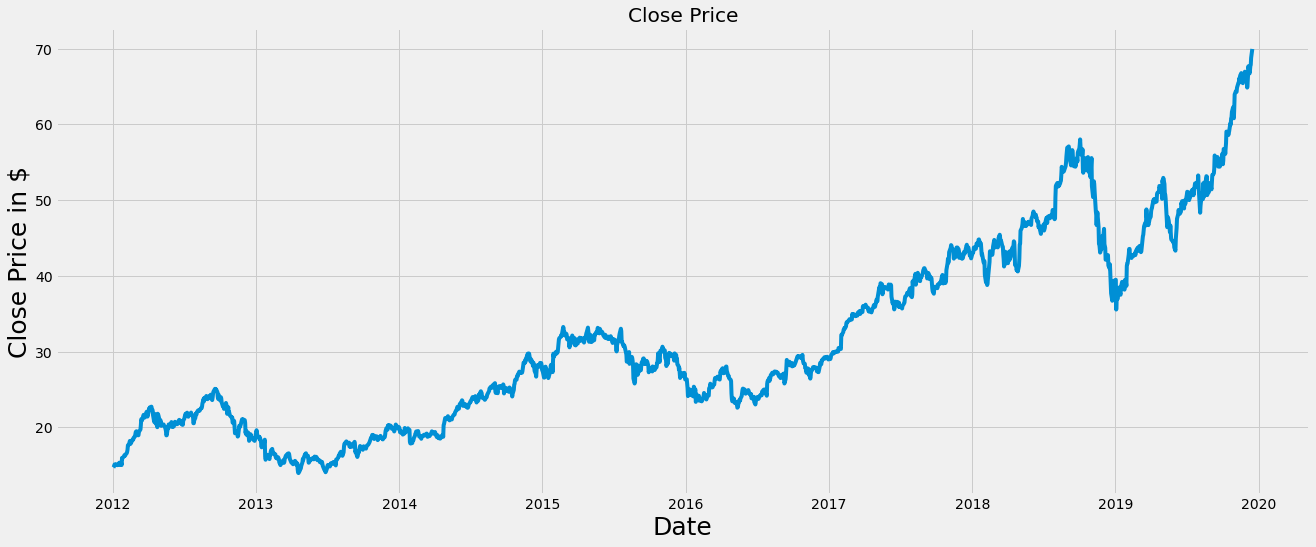

In [26]:
plt.figure(figsize=(20,8))
plt.title('Close Price')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=25)
plt.ylabel('Close Price in $', fontsize=25)

Text(0, 0.5, 'Open Price in $')

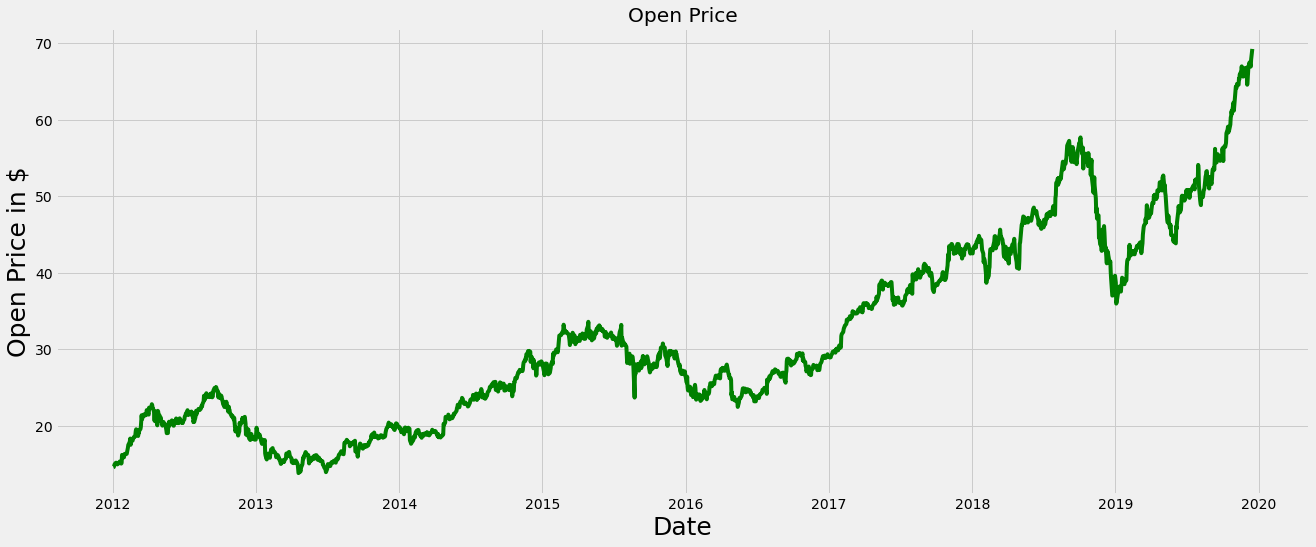

In [30]:
plt.figure(figsize=(20,8))
plt.title('Open Price')
plt.plot(df['Open'],color='green')
plt.xlabel('Date', fontsize=25)
plt.ylabel('Open Price in $', fontsize=25)

Text(0, 0.5, 'High Price in $')

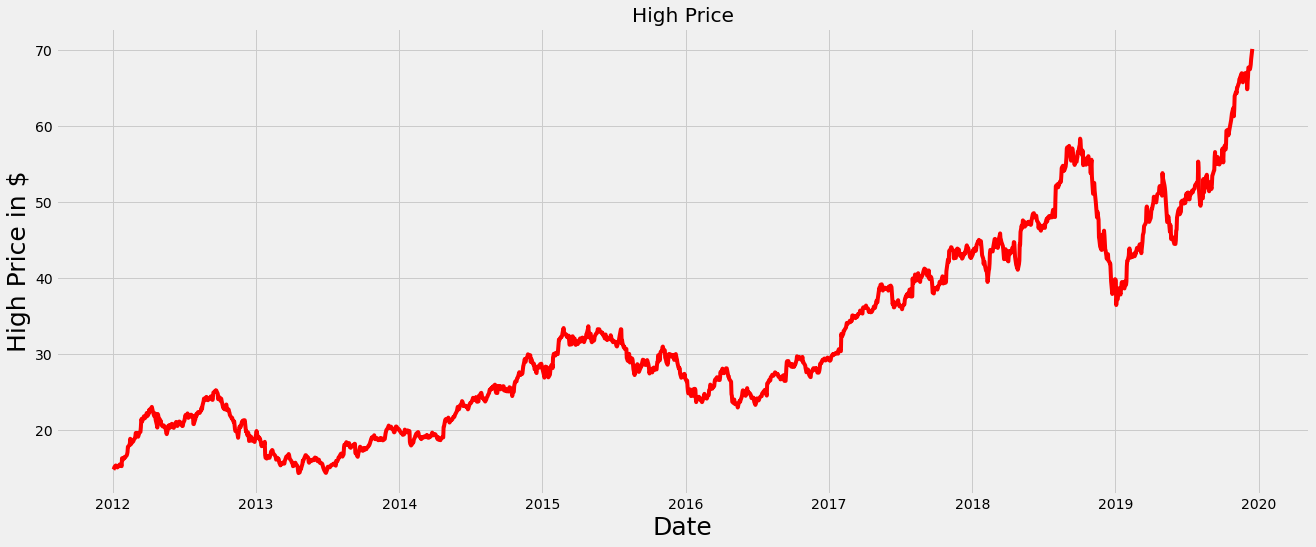

In [29]:
plt.figure(figsize=(20,8))
plt.title('High Price')
plt.plot(df['High'],color='red')
plt.xlabel('Date', fontsize=25)
plt.ylabel('High Price in $', fontsize=25)

In [31]:
data = df.filter(['Close'])
dataset = data.values
len(dataset)

2002

In [32]:
print(dataset)

[[14.6867857 ]
 [14.76571369]
 [14.92964268]
 ...
 [67.86499786]
 [68.78749847]
 [69.96499634]]


**Using 80% data as training data**

In [33]:
data_train= math.ceil(len(dataset)*.8)
data_train

1602

**Normalizing the data**

In [34]:
sc = MinMaxScaler(feature_range=(0,1))
scaled_data = sc.fit_transform(dataset)
print(scaled_data.shape)
print(scaled_data)

(2002, 1)
[[0.0131974 ]
 [0.01460639]
 [0.01753278]
 ...
 [0.96251174]
 [0.97897982]
 [1.        ]]


**Splitting the dataset into training and testing data.**

In [35]:
training_data= scaled_data[0:data_train, :]
print(len(training_data))
x_train, y_train = [], []

for i in range(100, len(training_data)):
  x_train.append(training_data[i-100:i, 0])
  y_train.append(training_data[i,0])
  if i<=101:
    print(x_train)
    print(y_train)

1602
[array([0.0131974 , 0.01460639, 0.01753278, 0.0203189 , 0.01989174,
       0.02085445, 0.02041453, 0.01967497, 0.01866762, 0.02178528,
       0.02459691, 0.02372983, 0.01898002, 0.02351306, 0.01905016,
       0.03578601, 0.03449178, 0.0361813 , 0.03983449, 0.0420468 ,
       0.04186191, 0.04117973, 0.04408699, 0.04682209, 0.04992063,
       0.05492545, 0.06543874, 0.06559812, 0.0714509 , 0.07582451,
       0.06830775, 0.07120224, 0.07114487, 0.07926096, 0.07810697,
       0.08024277, 0.08408086, 0.08621669, 0.0923691 , 0.0968511 ,
       0.09814534, 0.09859802, 0.09093461, 0.08908567, 0.08935984,
       0.09656423, 0.09859166, 0.10294617, 0.1132108 , 0.12690551,
       0.12434252, 0.12434889, 0.13425015, 0.13734869, 0.13514271,
       0.13312806, 0.13103049, 0.13799896, 0.14278065, 0.14478257,
       0.13983513, 0.13326194, 0.14542651, 0.15224196, 0.14904781,
       0.15502174, 0.15664748, 0.15168093, 0.15025281, 0.14806597,
       0.13688324, 0.12088061, 0.13973312, 0.13886606, 0

In [36]:
testing_data = scaled_data[data_train: , :]
print(len(testing_data))
x_test, y_test = [], []

for i in range(100, len(testing_data)):
  x_test.append(testing_data[i-100:i, 0])
  y_test.append(training_data[i,0])
  if i<=101:
    print(x_test)
    print(y_test)

400
[array([0.59084215, 0.58553137, 0.58249657, 0.58838762, 0.58629005,
       0.59164551, 0.59070827, 0.59262735, 0.58959255, 0.58780742,
       0.58499578, 0.60003577, 0.60713175, 0.61373681, 0.61672694,
       0.61440628, 0.60655155, 0.60445398, 0.60914003, 0.60208866,
       0.60253497, 0.59378768, 0.59334143, 0.5797296 , 0.58334453,
       0.57870315, 0.57629315, 0.5640202 , 0.57410631, 0.57290138,
       0.57888164, 0.57714111, 0.58637926, 0.57183026, 0.57843532,
       0.58990498, 0.60155313, 0.60052669, 0.58950334, 0.60356142,
       0.6049003 , 0.60302589, 0.60543583, 0.60074978, 0.6073549 ,
       0.60539122, 0.6061499 , 0.61235332, 0.62047582, 0.61775345,
       0.60333826, 0.598563  , 0.60025886, 0.6502879 , 0.67657433,
       0.67925209, 0.68407202, 0.67532472, 0.67594952, 0.68322406,
       0.67719913, 0.68317939, 0.68710675, 0.68929359, 0.70303931,
       0.7220512 , 0.71258989, 0.71071542, 0.71076009, 0.71272377,
       0.7157139 , 0.72365784, 0.73151251, 0.74615079, 0.

In [37]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1], 1))
print(x_train.shape, y_train.shape)

(1502, 100, 1) (1502,)


In [38]:
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
print(x_test.shape, y_test.shape)

(300, 100, 1) (300,)


**Predicting the stock prices using RNN **

In [39]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))

In [40]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


**Training the LSTM Model**

In [43]:
lstm_model = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size = 64, epochs=80, verbose=1)

Epoch 1/80
24/24 [==============================] - 5s 193ms/step - loss: 4.3954e-04 - val_loss: 0.3422
Epoch 2/80
24/24 [==============================] - 5s 197ms/step - loss: 4.3079e-04 - val_loss: 0.3457
Epoch 3/80
24/24 [==============================] - 5s 194ms/step - loss: 4.2580e-04 - val_loss: 0.3650
Epoch 4/80
24/24 [==============================] - 5s 195ms/step - loss: 4.3387e-04 - val_loss: 0.3156
Epoch 5/80
24/24 [==============================] - 5s 195ms/step - loss: 4.1103e-04 - val_loss: 0.3497
Epoch 6/80
24/24 [==============================] - 5s 199ms/step - loss: 3.8503e-04 - val_loss: 0.3430
Epoch 7/80
24/24 [==============================] - 5s 198ms/step - loss: 3.7551e-04 - val_loss: 0.3263
Epoch 8/80
24/24 [==============================] - 5s 197ms/step - loss: 3.6895e-04 - val_loss: 0.3272
Epoch 9/80
24/24 [==============================] - 5s 196ms/step - loss: 3.7235e-04 - val_loss: 0.3229
Epoch 10/80
24/24 [==============================] - 5s 198ms/st

**Visualizing Loss**

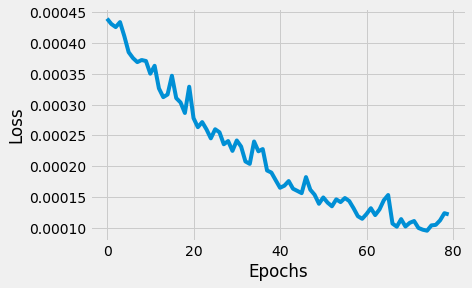

In [44]:
plt.plot(lstm_model.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

Making Prediction

In [45]:
train_predictions = model.predict(x_train)
test_predictions = model.predict(x_test)

In [47]:
train_predictions = sc.inverse_transform(train_predictions)
test_predictions = sc.inverse_transform(test_predictions)

In [48]:
train_predictions.shape

(1502, 1)

In [49]:
test_predictions.shape

(300, 1)

Using an evaluation metric

In [50]:
math.sqrt(mean_squared_error(y_train,train_predictions))

28.289347411740863

In [51]:
math.sqrt(mean_squared_error(y_test,test_predictions))

51.02353803895279

Visualizing the prediction

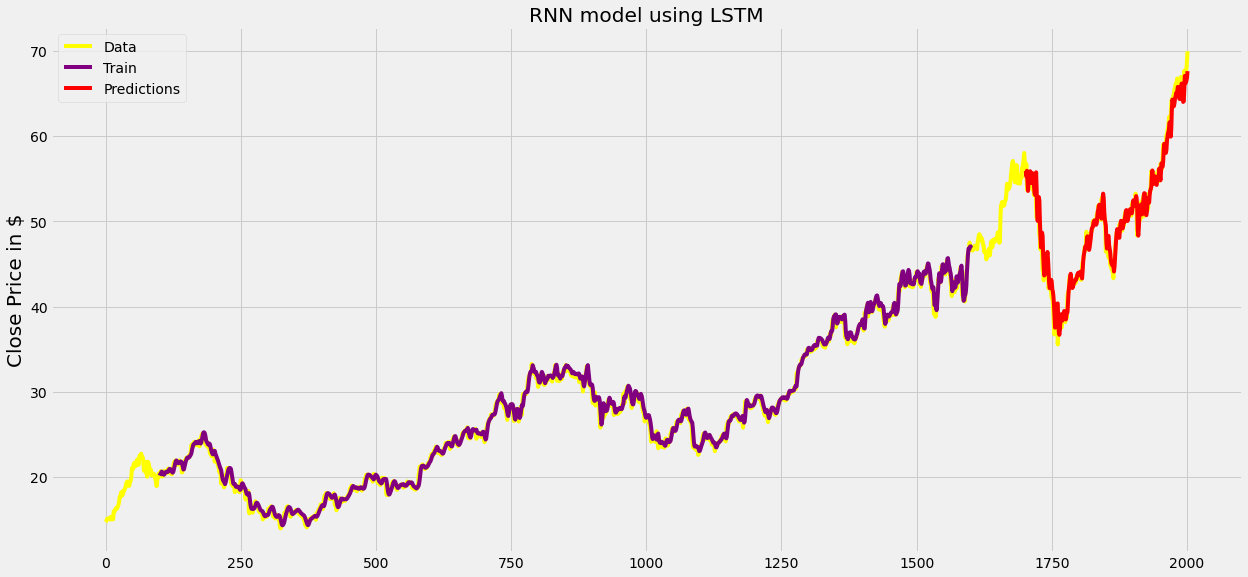

In [56]:
# train predictions
train_prediction_plot = np.empty_like(dataset)
train_prediction_plot[:, :] = np.nan
train_prediction_plot[100:len(train_predictions)+100, :] = train_predictions

# test predictions
test_prediction_plot = np.empty_like(dataset)
test_prediction_plot[:] = np.nan
test_prediction_plot[len(train_predictions)+(100*2):len(dataset), :] = test_predictions

plt.figure(figsize = (19,9))
plt.title('RNN model using LSTM')
plt.ylabel('Close Price in $', fontsize = 20)

plt.plot(dataset,color='yellow')
plt.plot(train_prediction_plot,color='purple')
plt.plot(test_prediction_plot,color='red')
plt.legend(['Data', 'Train', 'Predictions'], loc='upper left')
plt.show()

According to this plot, our LSTM model is very accurate as it predicts stocks accurately.